This notebook is a reduced version of the notebook that details how an image-based recommendation system works.

I strongly recommend starting with that notebook in order to understand how such a system works. All the functions used here have been defined in that tutorial. These functions have been grouped in four packages ```ibrs_utils.py```, ```features_extraction.py```, ```nearest_neighbors.py``` and ```googlenet.py``` and imported here.

In [1]:
from googlenet import GoogLeNet
from features_extraction import FeaturesExtraction
from nearest_neighbors import NearestNeighbors

from ibrs_utils import unzip_data, generate_database, get_all_items, visualize_random_items, recommend_items

import settings

2025-12-01 19:56:31.476322: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 19:56:31.476680: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 19:56:31.479293: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 19:56:31.507737: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 19:56:32.037231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

First, let's unzip our dataset

In [2]:
unzip_data()

[INFO] unzip the dataset ...


From metadata.json, generate individual metadata for all items and save them in folder ```items metadata```

In [3]:
generate_database(metadata=settings.ENV_DATASET_METADATA_JSON_FILE, folder=settings.ENV_DATASET_METADATA_DIR)

[INFO] generating metadata file for each item ...


Randomly visualize 50 items of our database

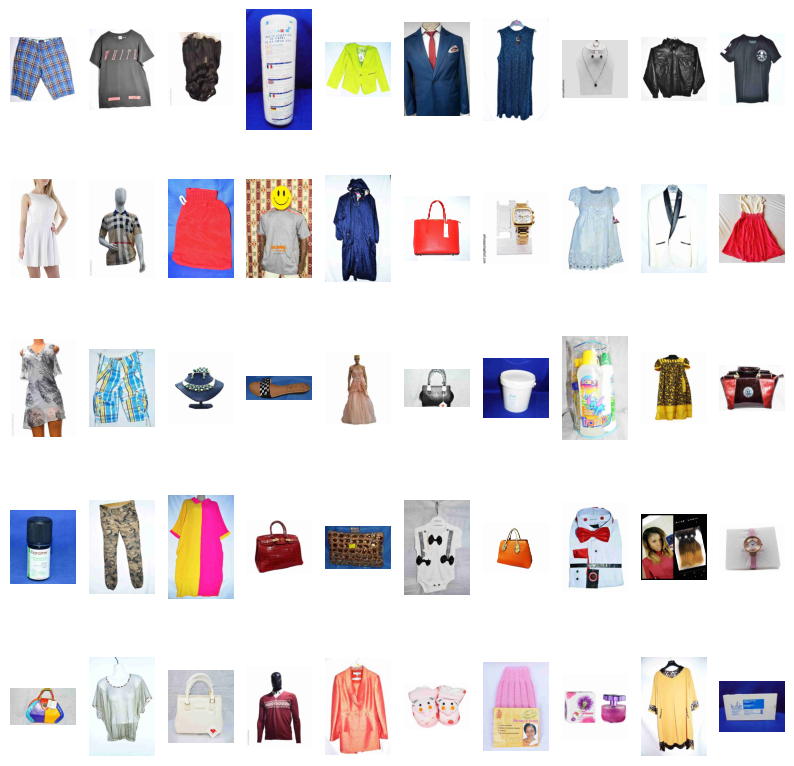

In [4]:
items = get_all_items()
visualize_random_items(items=items)

### Features Extraction

Now, let's extract images features of items

In [5]:
# instanciate our features extractor
extractor = FeaturesExtraction()

# use the extractor to extract all our images features
extractor.extract_features(items=items)

[INFO] Downloading /home/projects/IBRS-v1/Image-Based-Recommendation-System/etc/googlenet/googlenet.tgz 27.6%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[INFO] Loading the model ...


2025-12-01 19:56:38.295921: W tensorflow/core/framework/op_def_util.cc:369] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().


[INFO] extract images features of the entire database ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1655/1655 [25:24<00:00,  1.09it/s]


### Similarities computations

Compute similarities between images using class NearestNeighbors

In [6]:
simularitor = NearestNeighbors()
simularitor.nearest_neighbors()

[INFO] create nmslib index ...



0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
*

[INFO] load nmslib index
[INFO] computing nearest neighbors for all images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1655/1655 [00:01<00:00, 841.17it/s]


### Top-10 recommandation

now we can use function ```recommend_items``` for top-10 recommendation on a given item.

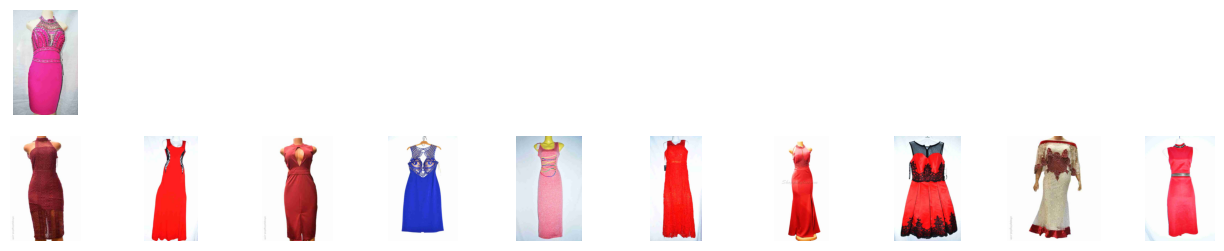

In [7]:
items = get_all_items()
recommend_items(items[300])

run recommendation on another item

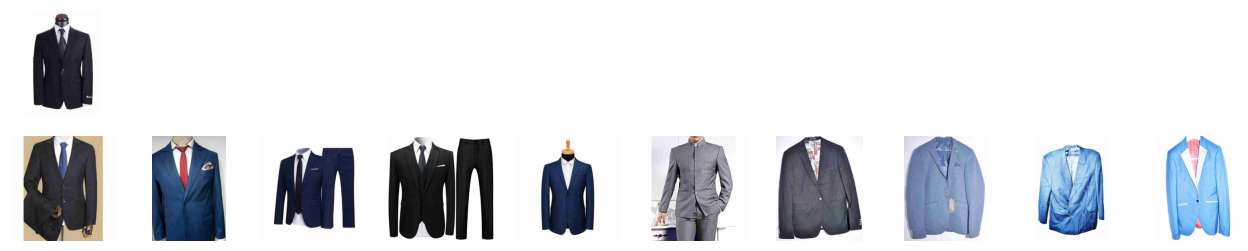

In [8]:
recommend_items(items[290])

### Authors

<b><i>Carmel WENGA</i></b>, Applied Machine Learning Research Engineer | <a href="https://shoppinglist.cm/fr/">ShoppingList</a>, Nzhinusoft